## Plots de figuras de MHW no Oceano Atlântico Tropical, no período de estudo para o TRIATLAS

Daniela Leite Corrêa

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import datetime
import xarray as xr

C:\Users\Daniela\Anaconda3\lib\site-packages\distributed\config.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config.update(yaml.load(text))


In [3]:
#dado = xr.open_dataset('/Users/Daniela/Documents/TRIATLAS/Angola/mhw_angola_1982_2020.nc')
#dado = xr.open_dataset('/Users/Daniela/Documents/TRIATLAS/tropical_atlantic/mhw_angola_1995_2021.nc')

#dado = xr.open_dataset('/Users/Daniela/Documents/TRIATLAS/tropical_atlantic/SST_MHW_TropicalAtlantic66.nc')
dado = xr.open_dataset('/Users/Daniela/Documents/TRIATLAS/tropical_atlantic/mhw_sst_equatorial_2021.nc')

In [4]:
dado

<xarray.Dataset>
Dimensions:       (lat: 68, lon: 160, time: 11688)
Coordinates:
  * lat           (lat) float32 -6.875 -6.625 -6.375 ... 9.375 9.625 9.875
  * lon           (lon) float32 320.125 320.375 320.625 ... 359.625 359.875
  * time          (time) int32 726468 726469 726470 ... 738153 738154 738155
Data variables:
    sst           (time, lat, lon) float32 ...
    sst_anom      (time, lat, lon) float64 ...
    mhw_category  (time, lat, lon) int32 ...
    seas          (time, lat, lon) float64 ...
    thresh        (time, lat, lon) float64 ...
Attributes:
    description:  SST and MHW (Benguela and Agulhas).

In [5]:
dado = dado.where(dado>-100) #filtrando os valores espúrios

In [6]:
time=dado.time
newtime=[datetime.datetime.fromordinal(int(time[i].data)) for i in range(len(time))] # criando o intervalo de tempo
dado =dado.assign(time=newtime)

In [7]:
dado = dado.sel(time=slice('2010-10-1', '2010-12-1'))

In [8]:
del time

In [9]:
dado

<xarray.Dataset>
Dimensions:       (lat: 68, lon: 160, time: 62)
Coordinates:
  * lat           (lat) float32 -6.875 -6.625 -6.375 ... 9.375 9.625 9.875
  * lon           (lon) float32 320.125 320.375 320.625 ... 359.625 359.875
  * time          (time) datetime64[ns] 2010-10-01 2010-10-02 ... 2010-12-01
Data variables:
    sst           (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    sst_anom      (time, lat, lon) float64 inf inf inf inf ... inf inf inf inf
    mhw_category  (time, lat, lon) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    seas          (time, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    thresh        (time, lat, lon) float64 nan nan nan nan ... nan nan nan nan
Attributes:
    description:  SST and MHW (Benguela and Agulhas).

In [10]:
dado.coords['lon'] = ((dado.coords['lon'] + 180) % 360) - 180
dado = dado.sortby(dado.lon) #modo crescente
dado

<xarray.Dataset>
Dimensions:       (lat: 68, lon: 160, time: 62)
Coordinates:
  * lat           (lat) float32 -6.875 -6.625 -6.375 ... 9.375 9.625 9.875
  * lon           (lon) float32 -39.875 -39.625 -39.375 ... -0.625 -0.375 -0.125
  * time          (time) datetime64[ns] 2010-10-01 2010-10-02 ... 2010-12-01
Data variables:
    sst           (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    sst_anom      (time, lat, lon) float64 inf inf inf inf ... inf inf inf inf
    mhw_category  (time, lat, lon) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    seas          (time, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    thresh        (time, lat, lon) float64 nan nan nan nan ... nan nan nan nan
Attributes:
    description:  SST and MHW (Benguela and Agulhas).

In [11]:
## Caso queira recorta a região para uma área menor, melhor que faça aqui para não ter que definir novas variáveis.
##
## Exemplo de um recorte para uma área de latitude 24N - 30N; longitude 270W - 285W
## dado_recortado=dado.sel(lat=slice(24,30)).sel(lon=slice(270,285))

In [12]:
mhw_category = dado.mhw_category
sst_anom=dado.sst_anom
sst=dado.sst
seas=dado.seas
thresh=dado.thresh
sst_anom_event=dado.sst_anom
sst_acum=sst_anom_event
mhw_category = dado.mhw_category.where(dado.mhw_category>0)
sst_anom_event=dado.sst_anom.where(dado.mhw_category>0)
#sst_acum=sst_anom_event.where(sst_anom_event>0)
lon=dado.lon
lat=dado.lat
time=dado.time

## Climatologia

In [13]:
tmean_month=dado.groupby('time.month').mean()     

<Figure size 432x288 with 0 Axes>

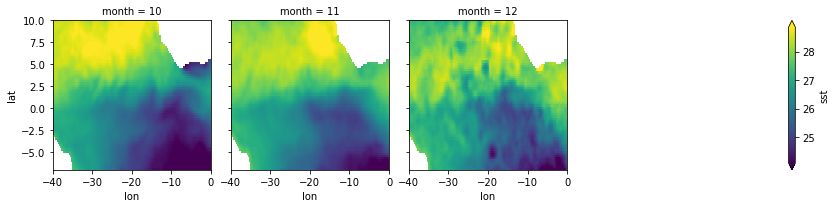

In [14]:
## médias mensais de tsm ( ou qualquer outra variável que queira colocar).
plt.figure()
fg = tmean_month.sst.plot(
    col='month',
    col_wrap=4,
    robust=True)
plt.savefig('climatology.png')

plt.show()

# Plot intensidade de temperatura de todo período do SST

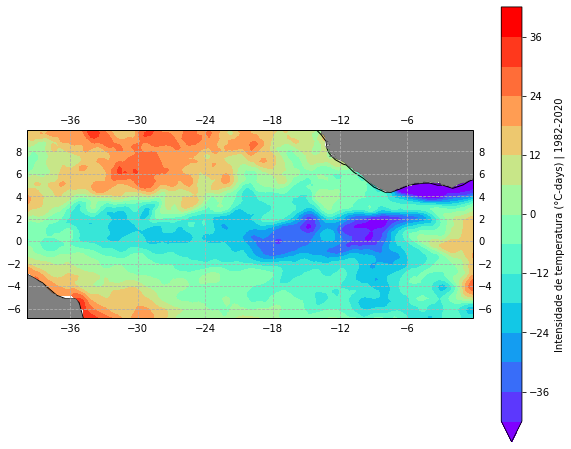

In [16]:
land = cfeature.NaturalEarthFeature('physical', 
                                    'land', 
                                    '50m', 
                                    edgecolor='black',
                                    facecolor='gray')
fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

### somatório dos valores positivos e plotando
sst_acum.sum(dim='time').plot.contourf(
    ax=axis,
    transform=ccrs.PlateCarree(),  
    #cmap='hot_r',
    cmap = 'rainbow',
    cbar_kwargs={"orientation": "vertical", "label":"Intensidade de temperatura (°C-days) | 1982-2020","shrink": 0.8},
    robust=True, levels=15)
plt.xlabel('Lon', fontsize=18)
plt.ylabel('Lat', fontsize=18)

#plt.text( 349, -6, 'South Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
#plt.text( 319, 41, 'North Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
axis.coastlines() 
axis.add_feature(land, linewidth=0.25)
gl=axis.gridlines(draw_labels=True,linestyle='--')
#gl.top_labels=True
#gl.right_labels=False
#gl.left_labels=False
#gl.bottom_labels=True


fig.set_size_inches(10,10)
#plt.title('Temperatura acumulada na região da Angola(1982-2020) ')
plt.xlabel('Lon', fontsize=18)
plt.ylabel('Lat', fontsize=18)
plt.show()
#fig.savefig('Temperature_intensity.jpeg')

In [17]:
#dado.index.to_pydatetime()

In [18]:
##Transformando a variável "mhw_category" para a contagem.

mhw_category_new = mhw_category*0
mhw_category_new = mhw_category_new+1

#mhw_category_new = mhw_category

In [19]:
mhw_category_new

<xarray.DataArray 'mhw_category' (time: 62, lat: 68, lon: 160)>
array([[[ 1.,  1.,  1., ..., nan, nan, nan],
        [ 1.,  1.,  1., ..., nan, nan, nan],
        [ 1.,  1.,  1., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.]],

       [[ 1.,  1.,  1., ..., nan, nan, nan],
        [ 1.,  1.,  1., ..., nan, nan, nan],
        [ 1.,  1.,  1., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.]],

       [[ 1.,  1.,  1., ..., nan, nan, nan],
        [ 1.,  1.,  1., ..., nan, nan, nan],
        [ 1.,  1.,  1., ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.]],

       [[ 1.,  1.,  1., ..., nan, nan, nan],
        [ 1.,  1.,  1., ..., nan, nan, nan],
        [ 1.,  1.,  1., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.]],

       [[ 1.,  1.,  1., ..., nan, nan, nan],
        [ 1.,  1.,  1., ..., nan, nan, nan],
        [ 1.,  1.,  1., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.]]])
Coordinates:
  * lat      (lat) float32 -6.875 -6.625 -6.375 -6.125 ... 9.375 9.625 9.875
  * lon      (lon) float32 -39.875 -39.625 -39.375 ... -0.625 -0.375 -0.125
  * time     (time) datetime64[ns] 2010-10-01 2010-10-02 ... 2010-12-01

## Plot dias de MHW 

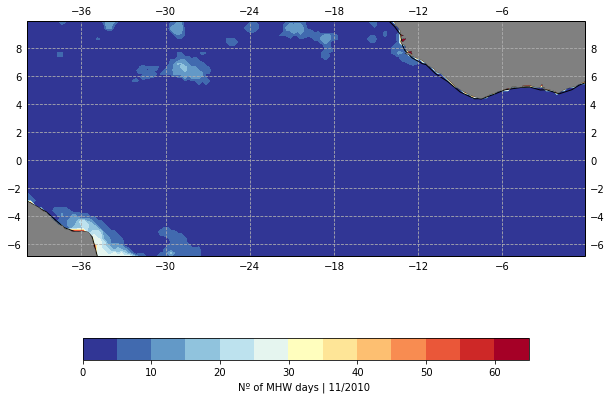

In [20]:
## gráfico mostrando a quantidade de dias com MHW
land = cfeature.NaturalEarthFeature('physical', 
                                    'land', 
                                    '50m', 
                                    edgecolor='black',
                                    facecolor='gray')
fig, axis = plt.subplots(
    1, 1, subplot_kw=dict(projection=ccrs.PlateCarree())
)

mhw_category_new.sum(dim='time').plot.contourf(
    ax=axis,
    transform=ccrs.PlateCarree(), 
    cmap='RdYlBu_r',
    cbar_kwargs={"orientation": "horizontal", "label":"Nº of MHW days | 11/2010 ","shrink": 0.8},
    robust=True,levels=15
)
#plt.text( 349, - 6, 'South Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
#plt.text( 319, 41, 'North Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
axis.coastlines() 
axis.add_feature(land, linewidth=0.25)
gl=axis.gridlines(draw_labels=True,linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.left_labels=False
gl.bottom_labels=False
fig.set_size_inches(10,10)
fig.savefig('MHW_days.jpeg')

plt.show()

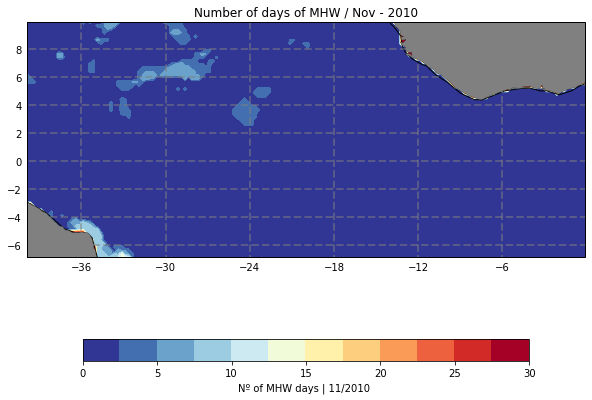

In [21]:
## gráfico mostrando a quantidade de dias com MHW
land = cfeature.NaturalEarthFeature('physical', 
                                    'land', 
                                    '50m', 
                                    edgecolor='black',
                                    facecolor='gray')
fig, axis = plt.subplots(
    1, 1, subplot_kw=dict(projection=ccrs.PlateCarree())
)

mhw_category_new.sel(time='2010-11').sum(dim='time').plot.contourf(
    ax=axis,
    transform=ccrs.PlateCarree(), 
    cmap='RdYlBu_r',
    cbar_kwargs={"orientation": "horizontal", "label":"Nº of MHW days | 11/2010 ","shrink": 0.8},
    robust=True,levels=15
)
#plt.text( 349, - 6, 'South Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
#plt.text( 319, 41, 'North Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
gl = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
axis.coastlines() 
axis.add_feature(land, linewidth=0.25)
#gl=axis.gridlines(draw_labels=True,linestyle='--')

fig.set_size_inches(10,10)
fig.savefig('MHW_days.jpeg')
plt.title('Number of days of MHW / Nov - 2010')
plt.show()

In [22]:
## Frequência anual
##Obs: Trocar os valores de acordo com o intervalo.
##(nº de MHW)/(número total de dias total/frequência desejada) 
mhw_cat_yearFreq = (mhw_category_new.sum(dim='time'))/(9490/365) 

## Plot frequência MHW

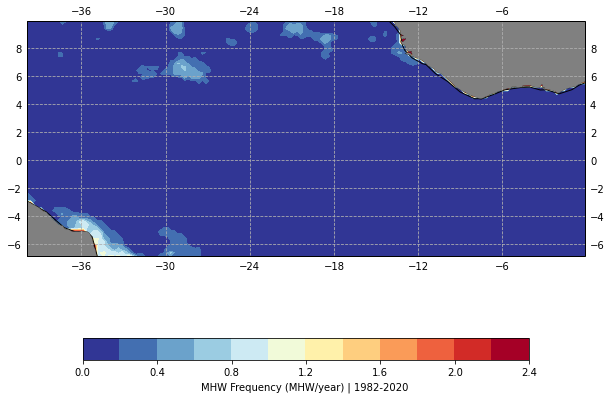

In [23]:
land = cfeature.NaturalEarthFeature('physical', 
                                    'land', 
                                    '50m', 
                                    edgecolor='black',
                                    facecolor='gray')
fig, axis = plt.subplots(
    1, 1, subplot_kw=dict(projection=ccrs.PlateCarree())
)

mhw_cat_yearFreq.plot.contourf(
    ax=axis,
    transform=ccrs.PlateCarree(), 
    cmap='RdYlBu_r',
    cbar_kwargs={"orientation": "horizontal", "label":"MHW Frequency (MHW/year) | 1982-2020 ","shrink": 0.8},
    robust=True, levels=15
)
#plt.text( 349, - 6, 'South Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
#plt.text( 319, 41, 'North Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
axis.coastlines() 
axis.add_feature(land, linewidth=0.25)
gl=axis.gridlines(draw_labels=True,linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.left_labels=False
gl.bottom_labels=False
fig.set_size_inches(10,10)
#fig.savefig('MHW_Frequency.jpeg')

plt.show()

In [24]:
### Abaixo temos exemplos de como realizar gráficos para um intervalo de tempo desejado
### Ex: Foi delimitado o mês de abril de 1983


for x in range(len(time)):
    land = cfeature.NaturalEarthFeature('physical', 
                                    'land', 
                                    '50m', 
                                    edgecolor='black',
                                    facecolor='gray')
    fig, axis = plt.subplots(
    1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))
    sst_anom.mean(dim='time').plot.contourf(
    ax=axis,
    transform=ccrs.PlateCarree(),  
    cmap='Spectral_r',
    cbar_kwargs={f"orientation": "horizontal","label":"SST anomaly (°C)| Abril, 2020", "shrink": 0.8},robust=True, levels=15)
    
    axis.coastlines()
    axis.add_feature(land,linewidth=0.25)
    gl=axis.gridlines(draw_labels=True,linestyle='--')
    gl.top_labels=False
    gl.right_labels=False
    gl.left_labels=False
    gl.bottom_labels=False
    fig.set_size_inches(10,10)
    plt.title('STT anomaly [x]')
fig.savefig('temperature_anomaly.jpeg')


plt.show()
    


## Plot anomalia do SST 

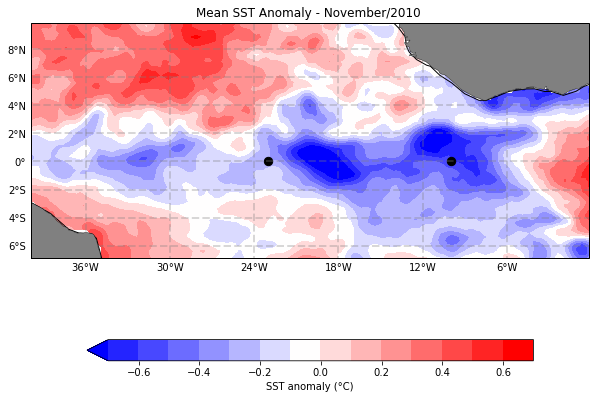

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

land = cfeature.NaturalEarthFeature('physical', 
                                    'land', 
                                    '50m', 
                                    edgecolor='black',
                                    facecolor='gray')
fig, axis = plt.subplots(
    1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))
    #sel(time='2001-1')
sst_anom.sel(time='2010-11').mean(dim='time').plot.contourf(
ax=axis,
transform=ccrs.PlateCarree(),  
cmap='bwr',
cbar_kwargs={"orientation": "horizontal","label":"SST anomaly (°C)", "shrink": 0.8},robust=True, levels=15)

#plt.text( 349, - 6, 'South Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
#plt.text( 319, 41, 'North Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
axis.coastlines()
axis.add_feature(land,linewidth=0.40)
#gl=axis.gridlines(draw_labels=True,linestyle='--')
#gl=axis.gridlines(draw_labels=True,linestyle='--')



gl = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.3, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
#gl.xlines = False
#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.xlabel_style = {'size': 15, 'color': 'gray'}
#gl.xlabel_style = {'size': 15, 'color': 'gray'}

axis.scatter(-23, 0, s=70, color='k', transform=ccrs.PlateCarree())
axis.scatter(-10, 0, s=70, color='k', transform=ccrs.PlateCarree())


#gl.top_labels=False
#gl.right_labels=False
#gl.left_labels=True
#gl.bottom_labels=True
fig.set_size_inches(10,10)
#fig.savefig('temperature_anomaly.jpeg')

plt.title('Mean SST Anomaly - November/2010 ')
plt.show()

## Plot intensidade de anomalia

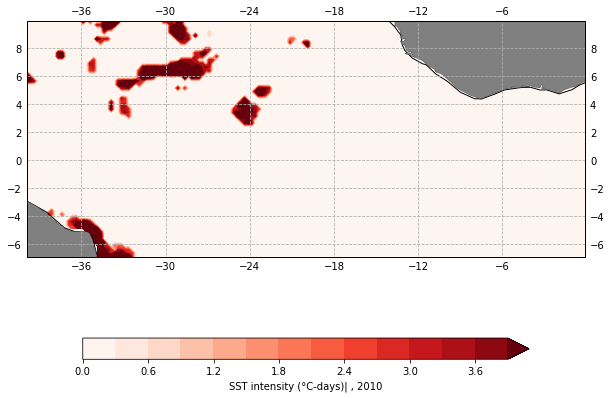

In [29]:
land = cfeature.NaturalEarthFeature('physical', 
                                    'land', 
                                    '50m', 
                                    edgecolor='black',
                                    facecolor='gray')
fig, axis = plt.subplots(
    1, 1, subplot_kw=dict(projection=ccrs.PlateCarree())
)

sst_anom_event.sel(time='2010-11').sum(dim='time').plot.contourf(
    ax=axis,
    transform=ccrs.PlateCarree(),  
    cmap='Reds',
    cbar_kwargs={"orientation": "horizontal","label":"SST intensity (°C-days)| , 2010", "shrink": 0.8},
    robust=True, levels=15
)
#plt.text( 349, - 6, 'South Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
#plt.text( 319, 41, 'North Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
axis.coastlines()
axis.add_feature(land,linewidth=0.25)
gl=axis.gridlines(draw_labels=True,linestyle='--')
#gl.top_labels=False
#gl.right_labels=False
gl.left_labels=False
gl.bottom_labels=False
fig.set_size_inches(10,10)
fig.savefig('temperature_intensity_nov.jpeg')

plt.show()

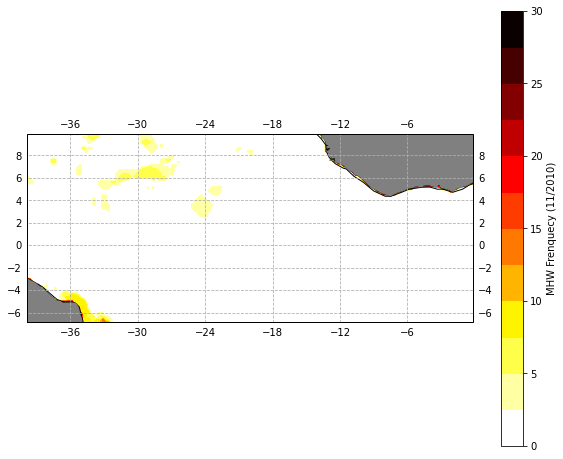

In [28]:
land = cfeature.NaturalEarthFeature('physical', 
                                    'land', 
                                    '50m', 
                                    edgecolor='black',
                                    facecolor='gray')
fig, axis = plt.subplots(
    1, 1, subplot_kw=dict(projection=ccrs.PlateCarree())
)

mhw_category_new.sel(time='2010-11').sum(dim='time').plot.contourf(
    ax=axis,
    transform=ccrs.PlateCarree(),  
    cmap='hot_r',
    cbar_kwargs={"orientation": "vertical","label":"MHW Frenquecy (11/2010)", "shrink": 0.8},
    robust=True, levels=15
)
#plt.text( 349, - 6, 'South Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
#plt.text( 319, 41, 'North Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
axis.coastlines()
axis.add_feature(land,linewidth=0.25)
gl=axis.gridlines(draw_labels=True,linestyle='--')
#gl.top_labels=False
gl.right_labels=False
gl.left_labels=False
gl.bottom_labels=False
fig.set_size_inches(10,10)
fig.savefig('MHW_frequency_nov.jpeg')

plt.show()